# **Class Notes**
## Samsung Innovation Campus
### Artificial Intelligece Module

### **Machine Learning: Supervised Learning - Regression Example**
Date: 25th Oct, 2025

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science'])

In [6]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

print("Dataset view")
display(df.head())

print("General information about the dataset:")
print(df.info())

Dataset view


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


General information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [8]:
# Clean and verify null values in the dataset
print("Value count null")
display(pd.isnull(df).sum())

Value count null


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# Set division of features and target variable

x = df.drop('quality', axis=1)
y = df['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Training data {x_train.shape}, Testing data {x_test.shape}")

Training data (1279, 11), Testing data (320, 11)


In [10]:
# Standardize the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

# Make predictions
y_pred = model.predict(x_test_scaled)

print("First ten predictions:")
print(y_pred[:10])

First ten predictions:
[5.34666441 5.05631345 5.66446972 5.46451484 5.72518476 5.27928659
 5.03421667 5.12623347 5.74534288 5.68665032]


In [14]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Model Evaluation Metrics:
Mean Squared Error: 0.39002514396395493
Root Mean Squared Error: 0.624519930798013
R^2 Score: 0.403180341279622


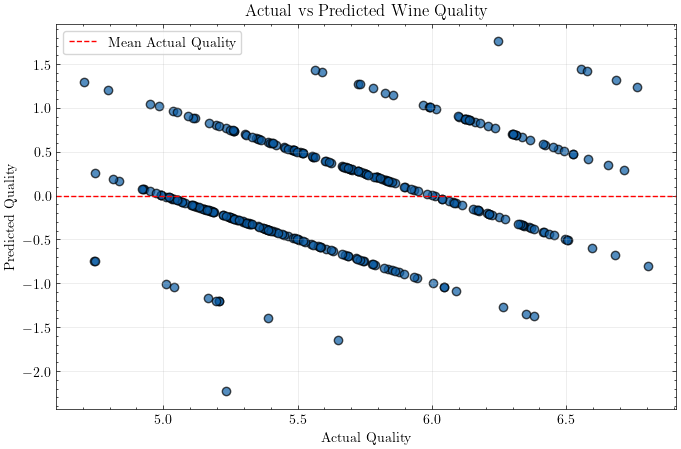

In [21]:
# Compute the residuals
residuals = y_test - y_pred


# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', label='Mean Actual Quality')
plt.title('Actual vs Predicted Wine Quality')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.legend(frameon=True)
plt.grid(True, alpha=0.3)
plt.show()

# **Machine Learning Models for Classification**
**Date:** Nov 1st, 2025

In [6]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Define a seed for reproducibility
SEED = 42
np.random.seed(SEED)

# Export dataframe from URL
url_pima = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df_pima = pd.read_csv(url_pima, header=None, names=column_names)

df_pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Select our depedent and independent variables
x = df_pima.drop('Outcome', axis=1)
y = df_pima['Outcome']

In [4]:
# Split the data for traiding and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
scaler= StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [12]:
def eval_model(modelo, x_tr, x_ts, y_ts):
    modelo.fit(x_tr, y_train)
    pred = modelo.predict(x_ts)
    return accuracy_score(y_ts, pred)

results = {}

nb_model = GaussianNB()
results['Naibves Bayes'] = eval_model(nb_model, x_train_scaled, x_test_scaled, y_test)

knn_model = KNeighborsClassifier(n_neighbors = 1)
results['KNN'] = eval_model(nb_model, x_train_scaled, x_test_scaled, y_test)

nb_model = LogisticRegression(solver='liblinear', random_state=SEED)
results['Logistic Regresion'] = eval_model(nb_model, x_train_scaled, x_test_scaled, y_test)

tree_model = DecisionTreeClassifier(random_state=SEED)
results["Desicion Tree"] = eval_model(tree_model, x_train_scaled, x_test_scaled, y_test)


df_results = pd.DataFrame(list(results.items()), columns =['Modelo', 'Precision'])
df_results = df_results.sort_values(by='Precision')

print(df_results.set_index("Modelo"))


                    Precision
Modelo                       
Desicion Tree        0.722944
Logistic Regresion   0.744589
Naibves Bayes        0.753247
KNN                  0.753247


## **Supervised Machine Learning**

Date: Nov 4th, 2025

### **Support Vector Machine (SVM)**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')

In [33]:
data = load_breast_cancer()
x = data.data
y = data.target # 0 (Malignant) and 1 (Benign) labels for classification

# Create the dataset
df = pd.DataFrame(x, columns=data.feature_names)
df['diagnosis'] = y

# Print information about the dataset
print(f'Dimensions of the dataset: {df.shape}')
print(f'Class distribution:\n{pd.Series(y).value_counts().to_string()}')
print(f'Valores nulos por columna:\n{np.unique(df.isnull().sum())}')
print(f'Feature names:\n{data.feature_names}')

Dimensions of the dataset: (569, 31)
Class distribution:
1    357
0    212
Valores nulos por columna:
[0]
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


This data has a imbalance between bot classes. 

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, \
                                                    random_state=42, stratify=y)
print(f"Training data: {x_train.shape}, Testing data: {x_test.shape}")

Training data: (398, 30), Testing data: (171, 30)


In [ ]:
# Linear kernel: when the data is linearly separable
# Hyperplane: w*x + b = 0
# C: Regularization parameter to control the trade-off between maximizing the margin and minimizing classification error
svm_linear = SVC(kernel='linear', 
                 C=1.0, 
                 random_state=42)

svm_linear.fit(x_train, y_train)
y_pred_linear = svm_linear.predict(x_test)

In [16]:
# Evaluation metrics
accuracy_linear = accuracy_score(y_test, y_pred_linear)
f1_linear = f1_score(y_test, y_pred_linear)

print("Linear Kernel SVM Evaluation Metrics:")
print(f"Accuracy: {accuracy_linear:.4f}")
print(f"F1 Score: {f1_linear:.4f}")
print(f'Support Vectors: {len(svm_linear.support_vectors_)}')

Linear Kernel SVM Evaluation Metrics:
Accuracy: 0.9825
F1 Score: 0.9860
Support Vectors: 31


In [ ]:
# RBF kernel: when the data is not linearly separable (Gaussian kernel)
# k(x, y) = exp(-γ ||x - y||^2)
# gamma: defines how far the influence of a single training example reaches
svm_rbf = SVC(kernel='rbf',
              C=1.0,
              gamma='scale',
              random_state=42)

svm_rbf.fit(x_train, y_train)
y_pred_rbf = svm_rbf.predict(x_test)

In [18]:
# Evaluation metrics
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)

print("Evaluation Metrics for SVM with RBF Kernel:")
print(f"Accuracy: {accuracy_rbf:.4f}")
print(f"F1 Score: {f1_rbf:.4f}")
print(f'Support Vectors: {len(svm_rbf.support_vectors_)}')

Evaluation Metrics for SVM with RBF Kernel:
Accuracy: 0.9766
F1 Score: 0.9813
Support Vectors: 96


The accurancy of linear kernel is better than rbf. This may be due to our data is linearly separable. 

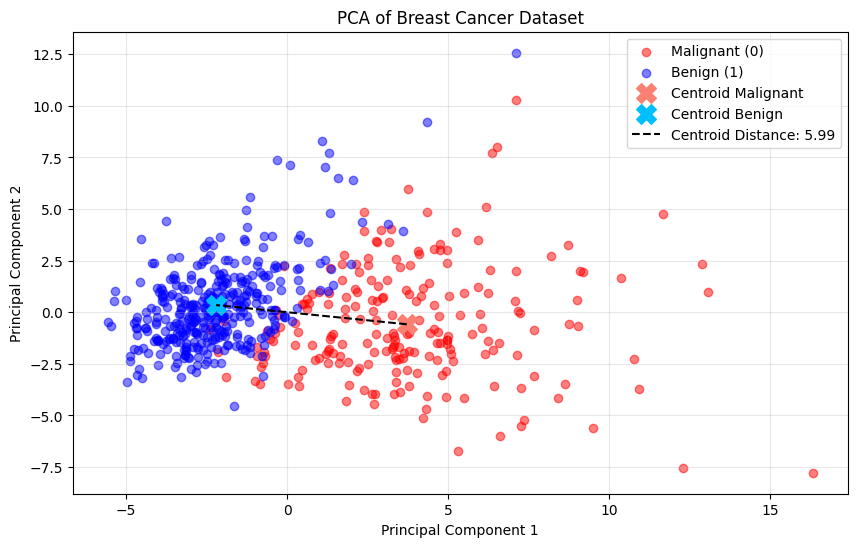

In [29]:
from sklearn.decomposition import PCA

# use PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
xpca = pca.fit_transform(x_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(xpca[y==0, 0], xpca[y==0, 1], color = 'red', 
            alpha=0.5, label='Malignant (0)')
plt.scatter(xpca[y==1, 0], xpca[y==1, 1], color = 'blue', 
            alpha=0.5, label='Benign (1)')
centroid_0 = np.mean(xpca[y==0], axis=0)
centroid_1 = np.mean(xpca[y==1], axis=0)
centroid_dist = np.linalg.norm(centroid_0 - centroid_1)

plt.scatter(centroid_0[0], centroid_0[1], color='salmon', 
            marker='X', s=200, label='Centroid Malignant')
plt.scatter(centroid_1[0], centroid_1[1], color='deepskyblue', 
            marker='X', s=200, label='Centroid Benign')
plt.plot([centroid_0[0], centroid_1[0]], 
         [centroid_0[1], centroid_1[1]],
         color='black', linestyle='--', label=f'Centroid Distance: {centroid_dist:.2f}')
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(frameon=True)
plt.grid(True, alpha=0.3)
plt.show()

**Does they are linearly separable?**

There is separation between malignant and benign. However, it is not totally clear if the dat is applicable for the RBF kernel since th central part shows some dat overlaping.

## **Methods**

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# from xboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
                'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

try:
    df_heart = pd.read_csv(url, header=None, names=column_names)
except Exception as e:
    print(f"Error loading data: {e}")

    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples=303, n_features=13, n_informative=10, n_redundant=3, random_state=42)
    df_heart = pd.DataFrame(X, columns=column_names[:-1])
    df_heart['target'] = y
print(f'Dimensions of the dataset: {df_heart.shape}')
print(f'Class distribution:\n{df_heart["target"].value_counts().to_string()}')
print(f'Valores nulos por columna:\n{np.unique(df_heart.isnull().sum())}')

Dimensions of the dataset: (303, 14)
Class distribution:
target
0    164
1     55
2     36
3     35
4     13
Valores nulos por columna:
[0]


In [72]:
# Replace ? for nan

df_heart = df_heart.replace('?', np.nan)

if df_heart.isnull().sum().sum():
    df_heart = df_heart.dropna()
    print(f'New dimensions after dropping nulls: {df_heart.shape}')

New dimensions after dropping nulls: (297, 14)


In [73]:
df_heart['target_binary'] = df_heart['target'].apply(lambda x: 1 if x > 0 else 0)
print(f'Class distribution after conversion:\n{df_heart["target_binary"].value_counts().to_string()}')

Class distribution after conversion:
target_binary
0    160
1    137


In [74]:
X = df_heart.drop(['target', 'target_binary'], axis=1)
y = df_heart['target_binary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42, stratify=y)
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")

Training data: (207, 13), Testing data: (90, 13)


In [75]:
result = {}

print("Individual Decision Tree Classifier")
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
result['Decision Tree'] = accuracy_tree

print(f"Accuracy: {accuracy_tree:.4f}")
print(f'Prompted Depth: {tree_model.get_depth()}')
print(f'Number of Leaves: {tree_model.get_n_leaves()}')

Individual Decision Tree Classifier
Accuracy: 0.7333
Prompted Depth: 9
Number of Leaves: 32


In [76]:
print('RANDOM FOREST: BAGGING')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
result['Random Forest'] = accuracy_rf

print(f"Accuracy: {accuracy_rf:.4f}")
print(f'Number of Trees: {len(rf_model.estimators_)}')
print(f'Split characteristics: {rf_model.max_features}')

RANDOM FOREST: BAGGING
Accuracy: 0.8556
Number of Trees: 100
Split characteristics: sqrt


In [1]:
# print("XGBOOST CLASSIFIER - BOOSTING")
# xgb_model = XGBClassifier(use_label_encoder=False, 
#                           eval_metric='logloss', random_state=42)
# xgb_model.fit(X_train, y_train)
# y_pred_xgb = xgb_model.predict(X_test)

# accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
# result['XGBoost'] = accuracy_xgb

# print(f"Accuracy: {accuracy_xgb:.4f}")
# print(f'Number of Trees: {xgb_model.n_estimators}')

# 

Date: Nov 11th, 2025